In [1]:
# Import libraries.
import MySQLdb as msql
import pandas as pd
from datetime import datetime
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# Get High Impact News Data.
use_database = False
impact = "'High Impact Expected'"

if use_database:
    db = msql.connect(host = "localhost", user = "root", passwd = "", db = "forex_data")
    query = "SELECT * FROM forex_factory WHERE impact = " + impact
    data = pd.read_sql_query(query, db)
else:
    data = pd.read_csv("./dataset/forex_news_data.csv")
    data.drop("Unnamed: 0", axis = 1, inplace = True)
    data.columns = "datetime currency impact name actual forecast previous".split()    
    data.datetime = pd.to_datetime(data.datetime)
    #data.set_index("datetime", inplace = True)
    
data[data.currency == "USD"].tail(10)

,datetime,currency,impact,name,actual,forecast,previous
12022,2018-12-19 14:00:00,USD,High Impact Expected,Federal Funds Rate,0.0,0.0,0.0
12023,2018-12-19 14:30:00,USD,High Impact Expected,FOMC Press Conference,0.0,0.0,0.0
12035,2018-12-21 08:30:00,USD,High Impact Expected,Core Durable Goods Orders m/m,-0.3,0.3,0.2
12036,2018-12-21 08:30:00,USD,High Impact Expected,Final GDP q/q,3.4,3.5,3.5
12038,2018-12-27 10:00:00,USD,High Impact Expected,CB Consumer Confidence,128.1,133.7,136.4
12039,2018-01-03 10:00:00,USD,High Impact Expected,ISM Manufacturing PMI,0.0,58.2,59.3
12042,2018-01-04 08:30:00,USD,High Impact Expected,Average Hourly Earnings m/m,0.0,0.3,0.2
12043,2018-01-04 08:30:00,USD,High Impact Expected,Non-Farm Employment Change,0.0,181.0,155.0
12044,2018-01-04 08:30:00,USD,High Impact Expected,Unemployment Rate,0.0,3.7,3.7
12045,2018-01-04 10:15:00,USD,High Impact Expected,Fed Chair Powell Speaks,0.0,0.0,0.0


In [3]:
# Define functions.
def formatData(data, name, currency):
    
    format_data =  data[(data.name == name) & (data.currency == currency)][["datetime", "actual", "forecast"]][0:-2].copy()
    format_data.set_index("datetime", inplace = True)
    format_data = format_data.sort_index()
    #format_data.drop_duplicates(keep ="first", inplace=True)
    format_data = format_data.resample("D").pad()
    #format_data["d"] = format_data.duplicated(keep = False)
    return format_data

    
def plotRate(data, name, currency):
    
    plot_data = formatData(data, name, currency)
    plot_data.plot(figsize = (12,6))
    plt.legend(loc = 1, prop={"size": 20})
    plt.title(name)
    plt.show()
    
def dataNormalization(data, name, currency):
    type_ = " (" + currency + ")"
    
    df = formatData(data, name, currency)
    norm_data = df["actual"].to_frame()
    norm_data.columns = [name + type_]
    x_min = norm_data[name + type_].min()
    x_max = norm_data[name + type_].max()
    mean = x_max - x_min
    norm_data[name + type_] = (norm_data[name + type_] - x_min) / mean
    return norm_data


In [4]:
# Get all currency news.
import sys

currency = "USD"
lista_currencies = data["currency"].unique()

print(lista_currencies)
#["Unemployment Rate", "Non-Farm Employment Change", "Advance GDP q/q", "Core Retail Sales m/m", "Final GDP q/q", "Core Durable Goods Orders m/m", "CB Consumer Confidence"]

data_usa = pd.DataFrame()

for j in range(len(lista_currencies)):
    
    currency = lista_currencies[j]
    
    list_usa_news = data[data.currency == currency]["name"].unique()
    for i in range(len(list_usa_news)):
        try:
            if (i == 0 or data_usa.empty) and j == 0:
                data_usa = dataNormalization(data, list_usa_news[i], currency).copy()
                #print(data_usa)
            else:
                df = dataNormalization(data, list_usa_news[i], currency).copy()
                data_usa = data_usa.join(df)
        except:
            print("error ", sys.exc_info()[0])

print(len(data_usa.columns))

['AUD' 'USD' 'CAD' 'GBP' 'NZD' 'EUR' 'CNY' 'CHF' 'JPY' 'All']
error  <class 'ValueError'>
error  <class 'ValueError'>
error  <class 'ValueError'>
error  <class 'ValueError'>
288


In [5]:
# Get specific currency news.
"""
import sys

currency = "USD"

#["Unemployment Rate", "Non-Farm Employment Change", "Advance GDP q/q", "Core Retail Sales m/m", "Final GDP q/q", "Core Durable Goods Orders m/m", "CB Consumer Confidence"]

data_usa = pd.DataFrame()

list_usa_news = data[data.currency == currency]["name"].unique()
for i in range(len(list_usa_news)):
    try:
        if i == 0 or data_usa.empty:
            data_usa = dataNormalization(data, list_usa_news[i], currency).copy()
            #print(data_usa)
        else:
            df = dataNormalization(data, list_usa_news[i], currency).copy()
            data_usa = data_usa.join(df)
    except:
        print("error ", sys.exc_info()[0])
"""

'\nimport sys\n\ncurrency = "USD"\n\n#["Unemployment Rate", "Non-Farm Employment Change", "Advance GDP q/q", "Core Retail Sales m/m", "Final GDP q/q", "Core Durable Goods Orders m/m", "CB Consumer Confidence"]\n\ndata_usa = pd.DataFrame()\n\nlist_usa_news = data[data.currency == currency]["name"].unique()\nfor i in range(len(list_usa_news)):\n    try:\n        if i == 0 or data_usa.empty:\n            data_usa = dataNormalization(data, list_usa_news[i], currency).copy()\n            #print(data_usa)\n        else:\n            df = dataNormalization(data, list_usa_news[i], currency).copy()\n            data_usa = data_usa.join(df)\n    except:\n        print("error ", sys.exc_info()[0])\n'

In [6]:
# Plot news.
corr_columns = list()
for c in data_usa.columns:
    if data_usa[c].sum() > 0:
        corr_columns.append(c)
print(len(corr_columns))

120


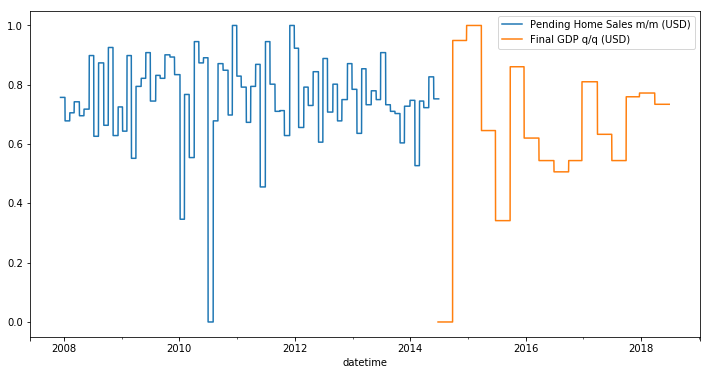

In [7]:
# Correlation NaN values explanation.
data_usa[["Pending Home Sales m/m (USD)", "Final GDP q/q (USD)"]].plot(figsize=(12,6))
plt.show()

In [8]:
data_usa[corr_columns].corr() ** 2

,Trade Balance (AUD),Building Approvals m/m (AUD),Retail Sales m/m (AUD),Cash Rate (AUD),GDP q/q (AUD),Employment Change (AUD),PPI q/q (AUD),CPI q/q (AUD),Home Loans m/m (AUD),Private Capital Expenditure q/q (AUD),...,Trade Balance (CNY),Libor Rate (CHF),Retail Sales y/y (CHF),CPI m/m (CHF),KOF Economic Barometer (CHF),Foreign Currency Reserves (CHF),Tankan Manufacturing Index (JPY),Prelim GDP q/q (JPY),Overnight Call Rate (JPY),Current Account (JPY)
Trade Balance (AUD),1.000000,0.005617,1.765962e-04,5.881745e-02,2.702296e-02,0.003082,0.056349,0.003599,1.724804e-01,0.098775,...,2.183082e-01,8.014973e-04,4.247153e-02,1.269599e-02,7.415489e-02,3.238174e-02,4.257450e-03,0.019645,3.378140e-04,1.163389e-01
Building Approvals m/m (AUD),0.005617,1.000000,8.114881e-03,1.406645e-02,3.091005e-06,0.000001,0.018837,0.002999,3.358348e-03,0.000422,...,7.562361e-03,5.776898e-03,1.346802e-02,8.773840e-03,5.298916e-02,3.149205e-03,5.105189e-02,0.000238,4.070681e-03,9.333531e-03
Retail Sales m/m (AUD),0.000177,0.008115,1.000000e+00,4.435302e-03,4.096828e-05,0.000111,0.000081,0.003290,1.875523e-02,0.007770,...,2.519192e-02,1.634654e-03,5.372399e-03,1.663162e-07,6.916253e-02,1.291012e-02,4.093333e-04,0.009830,4.531916e-04,6.720642e-04
Cash Rate (AUD),0.058817,0.014066,4.435302e-03,1.000000e+00,6.265960e-05,0.003479,0.213802,0.245076,1.332598e-01,0.207606,...,1.246249e-02,8.076075e-01,6.667706e-02,2.696746e-04,5.494222e-01,6.416156e-01,6.861231e-01,0.019554,2.985819e-02,2.754693e-01
GDP q/q (AUD),0.027023,0.000003,4.096828e-05,6.265960e-05,1.000000e+00,0.004531,0.023219,0.019770,9.140078e-02,0.005083,...,1.945930e-02,3.856435e-06,4.324486e-02,3.874687e-04,3.404298e-02,4.288531e-02,2.698975e-01,0.155194,1.383994e-02,1.729704e-02
Employment Change (AUD),0.003082,0.000001,1.113151e-04,3.478716e-03,4.530784e-03,1.000000,0.004943,0.000165,9.537893e-03,0.020825,...,1.928225e-02,2.324799e-04,4.403420e-03,1.017535e-01,4.144204e-02,3.786405e-02,1.385475e-01,0.009925,4.818330e-03,5.685802e-02
PPI q/q (AUD),0.056349,0.018837,8.051358e-05,2.138025e-01,2.321936e-02,0.004943,1.000000,0.278091,1.250815e-03,0.037269,...,NaN,1.798512e-01,6.966457e-02,7.299545e-02,3.101924e-01,5.584405e-03,2.837386e-01,0.008993,3.342053e-02,9.712261e-03
CPI q/q (AUD),0.003599,0.002999,3.289741e-03,2.450756e-01,1.976953e-02,0.000165,0.278091,1.000000,8.787754e-02,0.025116,...,2.514684e-03,2.553245e-01,1.185708e-02,3.123130e-03,7.608227e-02,7.377657e-03,2.976650e-01,0.065187,2.075965e-02,1.033202e-01
Home Loans m/m (AUD),0.172480,0.003358,1.875523e-02,1.332598e-01,9.140078e-02,0.009538,0.001251,0.087878,1.000000e+00,0.008414,...,NaN,1.200072e-01,2.278601e-02,2.531926e-02,2.156376e-02,1.220895e-01,7.125261e-02,0.135711,3.993868e-02,NaN
Private Capital Expenditure q/q (AUD),0.098775,0.000422,7.770057e-03,2.076057e-01,5.083323e-03,0.020825,0.037269,0.025116,8.413582e-03,1.000000,...,1.893464e-01,1.049950e-01,1.614751e-04,1.513542e-01,4.875965e-06,4.483513e-02,5.436750e-02,0.033478,2.990694e-02,2.218608e-02


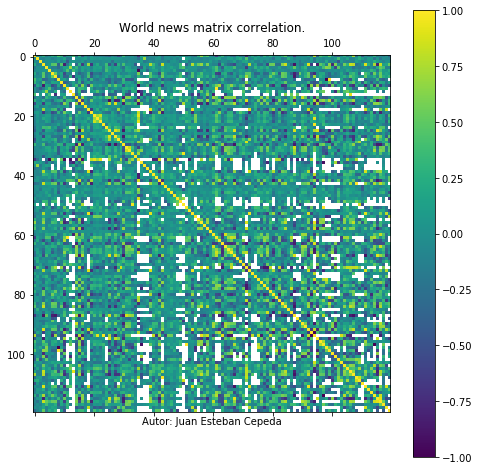

In [9]:
plt.figure(figsize=(8,8))
plt.matshow(data_usa[corr_columns].corr(), fignum = 1)
plt.colorbar()
plt.title("World news matrix correlation.")
plt.xlabel("Autor: Juan Esteban Cepeda")
plt.savefig("./results/matrix_" + currency.lower() + "_news.png")

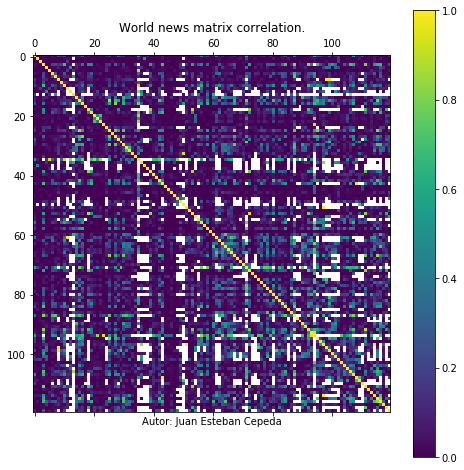

In [10]:
plt.figure(figsize=(8,8))
plt.matshow(data_usa[corr_columns].corr() ** 2, fignum = 1)
plt.colorbar()
plt.title("World news matrix correlation.")
plt.xlabel("Autor: Juan Esteban Cepeda")
plt.savefig("./results/matrix_world_news.png")

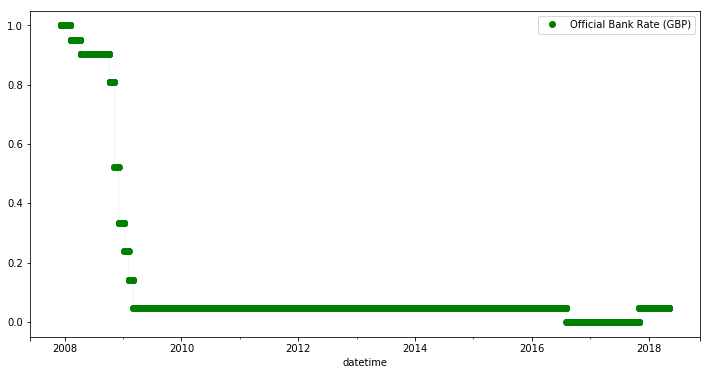

In [11]:
data_usa[["Official Bank Rate (GBP)"]].plot(figsize=(12,6), c="g", marker = "o", linestyle="dashed", linewidth=0.1)

In [53]:
# Show correlations.
"""
0.00-0.19: very weak
0.20-0.39: weak
0.40-0.59: moderate 
0.60-0.79: strong
0.80-1.00: very strong.
"""

thr = 0.85
df_corr = (data_usa[corr_columns].corr()).copy()
for c in df_corr.columns:
    if c == "Federal Funds Rate (USD)":

        print("Correlación entre: ", c)

        output = df_corr[c][(df_corr[c] > thr) | (df_corr[c] < thr * -1)]

        print("------ Normal -----")

        print(output)

        print("------ Squared ----- ")

        print(output ** 2)

        print("")

        #df = pd.DataFrame(data = [output], columns = ["a", "b"])
        #print(df, type(df))



Correlación entre:  Federal Funds Rate (USD)
------ Normal -----
Federal Funds Rate (USD)    1.000000
Overnight Rate (CAD)        0.918445
Official Bank Rate (GBP)    0.949285
Official Cash Rate (NZD)    0.896345
Libor Rate (CHF)            0.854580
Name: Federal Funds Rate (USD), dtype: float64
------ Squared ----- 
Federal Funds Rate (USD)    1.000000
Overnight Rate (CAD)        0.843542
Official Bank Rate (GBP)    0.901142
Official Cash Rate (NZD)    0.803434
Libor Rate (CHF)            0.730306
Name: Federal Funds Rate (USD), dtype: float64



In [51]:
#data_usa["Official Bank Rate (GBP)"].plot()

"""
Federal Funds Rate (USD)       0.901142
Overnight Rate (CAD)           0.860651
Official Bank Rate (GBP)       1.000000
Official Cash Rate (NZD)       0.929469
Main Refinancing Rate (EUR)    0.797050
Libor Rate (CHF)               0.847052
"""

columns = """Official Bank Rate (GBP)|Federal Funds Rate (USD)|Overnight Rate (CAD)|Official Cash Rate (NZD)|Main Refinancing Rate (EUR)|Libor Rate (CHF)"""        
columns = columns.split("|")

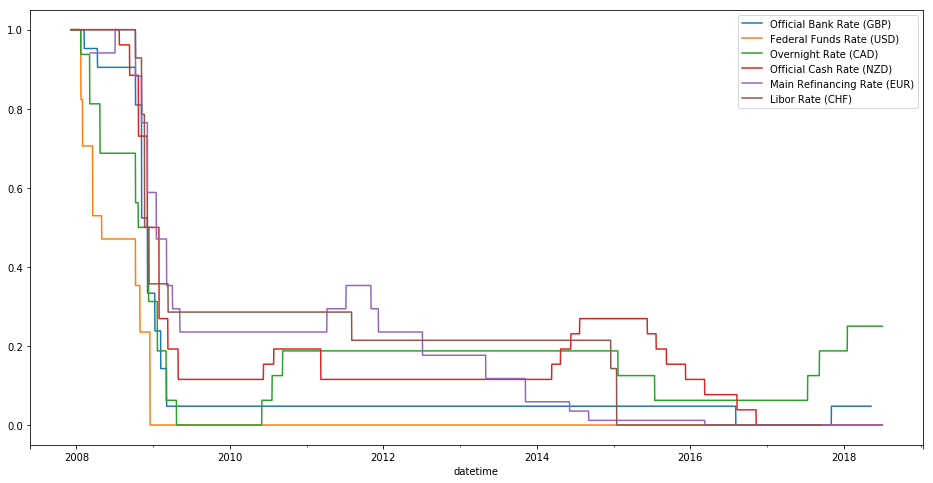

In [52]:
data_usa[columns].plot(figsize=(16,8))

In [679]:
# Creating prediction models.
#from sklearn import DecisionTreeRegression

In [23]:
columns = ["Unemployment Rate (USD)", "Building Permits (USD)", "Unemployment Rate (CAD)", "Unemployment Rate (GBP)", "Core Retail Sales q/q (NZD)", "Foreign Currency Reserves (CHF)"]
columns = ["Unemployment Rate (USD)", "Building Permits (USD)", "Unemployment Rate (CAD)"]

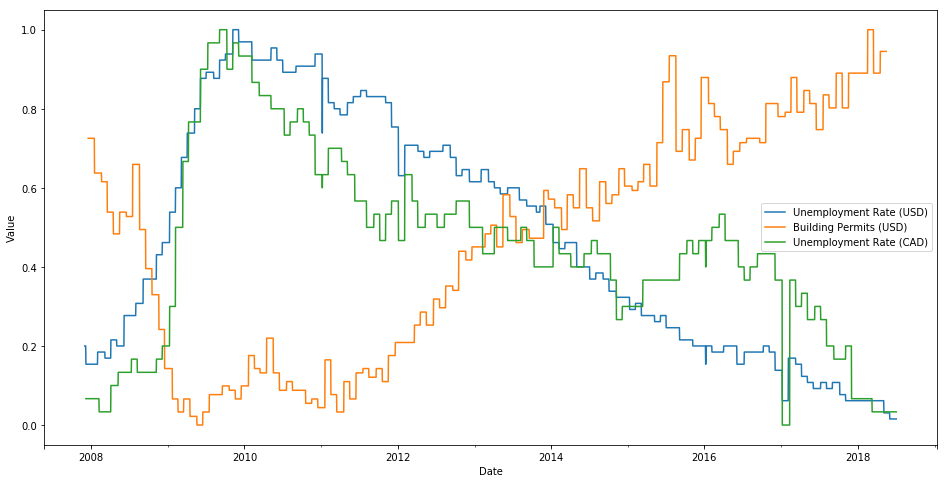

In [31]:
data_usa[columns].plot(figsize=(16,8))
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("")
plt.show()

In [45]:
columns =  [
"Building Permits (USD)", 
"Unemployment Rate (USD)",     
"CB Consumer Confidence (USD)",           
"Unemployment Claims (USD)",         
"Asset Purchase Facility (GBP)",
"Core Retail Sales q/q (NZD)",            
"German Flash Manufacturing PMI (EUR)",   
"Foreign Currency Reserves (CHF)"
]   

columns =  [
"Building Permits (USD)", 
"Unemployment Rate (USD)",     
"CB Consumer Confidence (USD)",           
"Unemployment Claims (USD)",               
]        

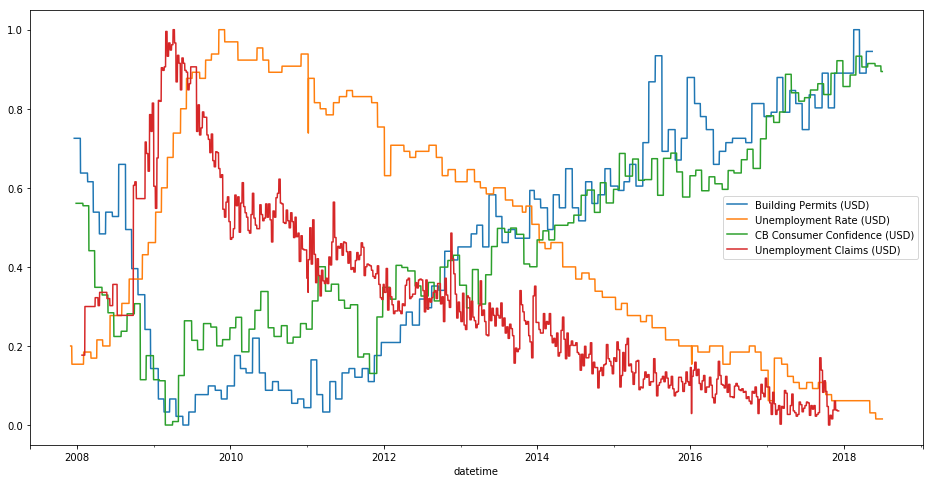

In [46]:
data_usa[columns].plot(figsize=(16,8))

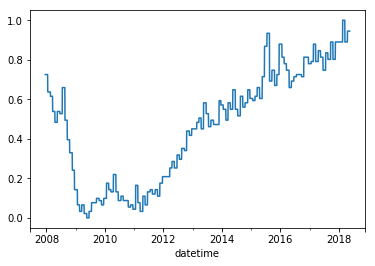

In [47]:
data_usa["Building Permits (USD)"].plot()

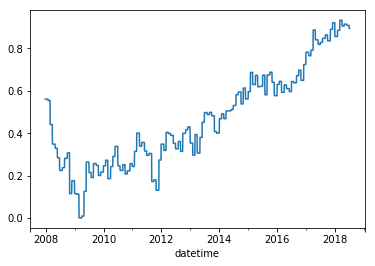

In [58]:
data_usa["CB Consumer Confidence (USD)"].plot()

In [57]:
# Consumer Confidence => Released monthly, on the last Tuesday of the current month;
# USD Unemployment Rate => Released monthly, usually on the first Friday after the month ends;
# Released monthly, about 17 days after the month ends;

In [20]:
columns = [
    "Cash Rate (AUD)", 
    "Inflation Expectations q/q (NZD)", 
    "Main Refinancing Rate (EUR)",
    "GDP q/y (CNY)",
]

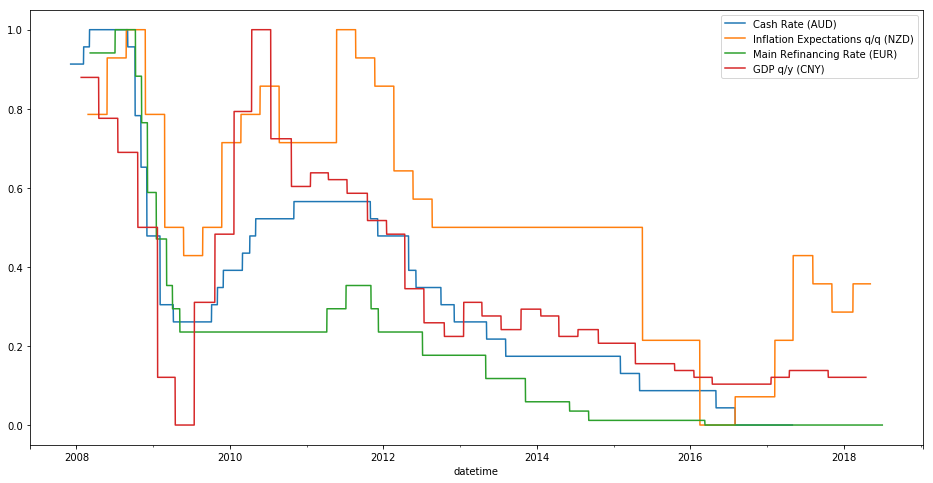

In [21]:
data_usa[columns].plot(figsize=(16,8))

In [ ]:
Correlación entre:  Federal Funds Rate (USD)
Federal Funds Rate (USD)       1.000000
Overnight Rate (CAD)           0.843542
Official Bank Rate (GBP)       0.901142
Official Cash Rate (NZD)       0.803434
Main Refinancing Rate (EUR)    0.718256
Libor Rate (CHF)               0.730306

In [36]:
columns = "Federal Funds Rate (USD)|Overnight Rate (CAD)|Official Bank Rate (GBP)|Official Cash Rate (NZD)|Main Refinancing Rate (EUR)|Libor Rate (CHF)".split("|")
columns

['Federal Funds Rate (USD)',
 'Overnight Rate (CAD)',
 'Official Bank Rate (GBP)',
 'Official Cash Rate (NZD)',
 'Main Refinancing Rate (EUR)',
 'Libor Rate (CHF)']

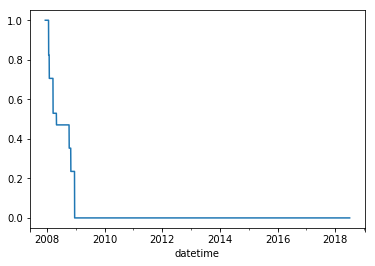

In [40]:
data_usa["Federal Funds Rate (USD)"].plot()

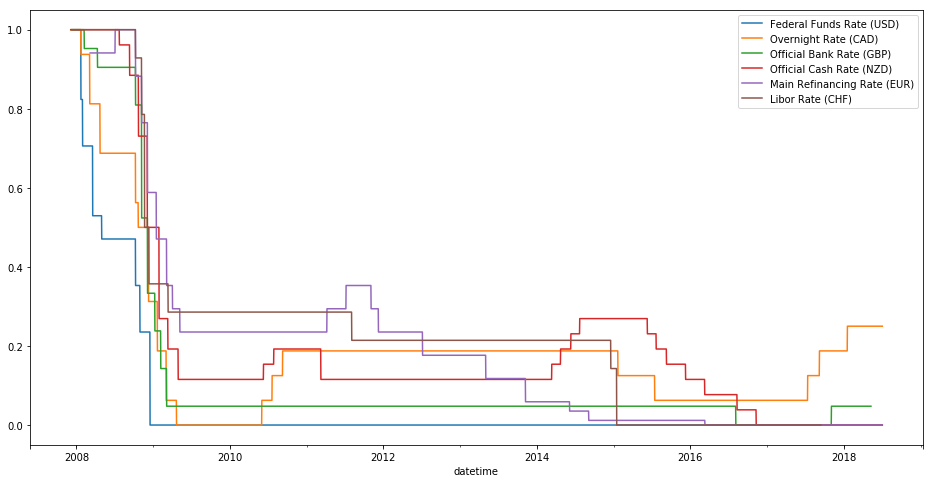

In [39]:
data_usa[columns].plot(figsize=(16,8))